In [86]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [87]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_07.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_07.tflite'

# Set number of classes

In [88]:
NUM_CLASSES = 26

# Dataset reading

In [89]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [90]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [91]:
len(X_dataset)

120958

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [94]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_9 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 45)                1935      
                                                                 
 dropout_10 (Dropout)        (None, 45)                0         
                                                                 
 dense_13 (Dense)            (None, 30)                1380      
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_14 (Dense)            (None, 15)                465       
                                                                 
 dense_15 (Dense)            (None, 26)               

In [95]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [96]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [97]:
abc = model.fit(
    X_train,
    y_train,
    epochs=10000,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/10000
709/709 [==============================] - 3s 4ms/step - loss: 2.4221 - accuracy: 0.2212 - val_loss: 1.3151 - val_accuracy: 0.6127
Epoch 2/10000
709/709 [==============================] - 2s 3ms/step - loss: 1.5844 - accuracy: 0.4373 - val_loss: 0.9275 - val_accuracy: 0.7194
Epoch 3/10000
709/709 [==============================] - 3s 4ms/step - loss: 1.3644 - accuracy: 0.5113 - val_loss: 0.8012 - val_accuracy: 0.7766
Epoch 4/10000
709/709 [==============================] - 2s 3ms/step - loss: 1.2483 - accuracy: 0.5548 - val_loss: 0.7304 - val_accuracy: 0.8128
Epoch 5/10000
709/709 [==============================] - 2s 4ms/step - loss: 1.1682 - accuracy: 0.5832 - val_loss: 0.6649 - val_accuracy: 0.8169
Epoch 6/10000
709/709 [==============================] - 2s 4ms/step - loss: 1.1205 - accuracy: 0.6016 - val_loss: 0.6521 - val_accuracy: 0.8025
Epoch 7/10000
709/709 [==============================] - 3s 4ms/step - loss: 1.0661 - accuracy: 0.6175 - val_loss: 0.6302 - val_ac

709/709 [==============================] - 2s 3ms/step - loss: 0.5801 - accuracy: 0.8118 - val_loss: 0.6204 - val_accuracy: 0.7528
Epoch 114/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5776 - accuracy: 0.8130 - val_loss: 0.5647 - val_accuracy: 0.7521
Epoch 115/10000
709/709 [==============================] - 3s 4ms/step - loss: 0.5781 - accuracy: 0.8129 - val_loss: 0.5622 - val_accuracy: 0.7711
Epoch 116/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5746 - accuracy: 0.8127 - val_loss: 0.6019 - val_accuracy: 0.7563
Epoch 117/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5750 - accuracy: 0.8132 - val_loss: 0.5889 - val_accuracy: 0.7598
Epoch 118/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5742 - accuracy: 0.8116 - val_loss: 0.5931 - val_accuracy: 0.7536
Epoch 119/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5750 - accuracy: 0.8134 - val_loss: 0.5626 - val_accu

Epoch 169/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5613 - accuracy: 0.8177 - val_loss: 0.6575 - val_accuracy: 0.7333
Epoch 170/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5598 - accuracy: 0.8186 - val_loss: 0.6254 - val_accuracy: 0.7362
Epoch 171/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5603 - accuracy: 0.8168 - val_loss: 0.6203 - val_accuracy: 0.7425
Epoch 172/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5557 - accuracy: 0.8192 - val_loss: 0.5945 - val_accuracy: 0.7459
Epoch 173/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5593 - accuracy: 0.8180 - val_loss: 0.6105 - val_accuracy: 0.7490
Epoch 174/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5638 - accuracy: 0.8165 - val_loss: 0.6187 - val_accuracy: 0.7579
Epoch 175/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5526 - accuracy: 0.8206 - val_loss: 0

Epoch 225/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5455 - accuracy: 0.8212 - val_loss: 0.6013 - val_accuracy: 0.7491
Epoch 226/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5432 - accuracy: 0.8221 - val_loss: 0.5954 - val_accuracy: 0.7538
Epoch 227/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5446 - accuracy: 0.8202 - val_loss: 0.6156 - val_accuracy: 0.7545
Epoch 228/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5477 - accuracy: 0.8207 - val_loss: 0.6396 - val_accuracy: 0.7430
Epoch 229/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5474 - accuracy: 0.8203 - val_loss: 0.6065 - val_accuracy: 0.7572
Epoch 230/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5465 - accuracy: 0.8207 - val_loss: 0.5918 - val_accuracy: 0.7594
Epoch 231/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5457 - accuracy: 0.8196 - val_loss: 0

Epoch 281/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5396 - accuracy: 0.8237 - val_loss: 0.6205 - val_accuracy: 0.7538
Epoch 282/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5410 - accuracy: 0.8224 - val_loss: 0.6169 - val_accuracy: 0.7685
Epoch 283/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5387 - accuracy: 0.8243 - val_loss: 0.5723 - val_accuracy: 0.7646
Epoch 284/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5339 - accuracy: 0.8231 - val_loss: 0.5640 - val_accuracy: 0.7692
Epoch 285/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5373 - accuracy: 0.8233 - val_loss: 0.6219 - val_accuracy: 0.7523
Epoch 286/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5404 - accuracy: 0.8231 - val_loss: 0.6077 - val_accuracy: 0.7510
Epoch 287/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5361 - accuracy: 0.8217 - val_loss: 0

Epoch 337/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5310 - accuracy: 0.8262 - val_loss: 0.5749 - val_accuracy: 0.7730
Epoch 338/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5311 - accuracy: 0.8258 - val_loss: 0.5795 - val_accuracy: 0.7718
Epoch 339/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.8262 - val_loss: 0.5944 - val_accuracy: 0.7745
Epoch 340/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5248 - accuracy: 0.8261 - val_loss: 0.6486 - val_accuracy: 0.7348
Epoch 341/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5251 - accuracy: 0.8271 - val_loss: 0.6276 - val_accuracy: 0.7558
Epoch 342/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5223 - accuracy: 0.8283 - val_loss: 0.6111 - val_accuracy: 0.7559
Epoch 343/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5309 - accuracy: 0.8273 - val_loss: 0

Epoch 393/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5134 - accuracy: 0.8304 - val_loss: 0.6528 - val_accuracy: 0.7321
Epoch 394/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5240 - accuracy: 0.8281 - val_loss: 0.5853 - val_accuracy: 0.7668
Epoch 395/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5226 - accuracy: 0.8298 - val_loss: 0.6254 - val_accuracy: 0.7486
Epoch 396/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5265 - accuracy: 0.8259 - val_loss: 0.6415 - val_accuracy: 0.7400
Epoch 397/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5172 - accuracy: 0.8302 - val_loss: 0.5475 - val_accuracy: 0.7727
Epoch 398/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5234 - accuracy: 0.8278 - val_loss: 0.6762 - val_accuracy: 0.7287
Epoch 399/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5213 - accuracy: 0.8294 - val_loss: 0

Epoch 449/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5115 - accuracy: 0.8310 - val_loss: 0.6146 - val_accuracy: 0.7617
Epoch 450/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5105 - accuracy: 0.8322 - val_loss: 0.6384 - val_accuracy: 0.7534
Epoch 451/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5129 - accuracy: 0.8319 - val_loss: 0.6297 - val_accuracy: 0.7531
Epoch 452/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5152 - accuracy: 0.8316 - val_loss: 0.6264 - val_accuracy: 0.7634
Epoch 453/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5147 - accuracy: 0.8320 - val_loss: 0.6536 - val_accuracy: 0.7665
Epoch 454/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5163 - accuracy: 0.8310 - val_loss: 0.6411 - val_accuracy: 0.7436
Epoch 455/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5149 - accuracy: 0.8305 - val_loss: 0

Epoch 505/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5089 - accuracy: 0.8352 - val_loss: 0.6725 - val_accuracy: 0.7485
Epoch 506/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5092 - accuracy: 0.8365 - val_loss: 0.6649 - val_accuracy: 0.7391
Epoch 507/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5131 - accuracy: 0.8327 - val_loss: 0.6233 - val_accuracy: 0.7437
Epoch 508/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5101 - accuracy: 0.8339 - val_loss: 0.6761 - val_accuracy: 0.7186
Epoch 509/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5110 - accuracy: 0.8331 - val_loss: 0.6710 - val_accuracy: 0.7630
Epoch 510/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5120 - accuracy: 0.8327 - val_loss: 0.6736 - val_accuracy: 0.7283
Epoch 511/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5081 - accuracy: 0.8350 - val_loss: 0

Epoch 561/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5142 - accuracy: 0.8343 - val_loss: 0.6348 - val_accuracy: 0.7512
Epoch 562/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5071 - accuracy: 0.8338 - val_loss: 0.6649 - val_accuracy: 0.7206
Epoch 563/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5044 - accuracy: 0.8355 - val_loss: 0.6432 - val_accuracy: 0.7652
Epoch 564/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5078 - accuracy: 0.8334 - val_loss: 0.5814 - val_accuracy: 0.7677
Epoch 565/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5040 - accuracy: 0.8351 - val_loss: 0.7060 - val_accuracy: 0.7226
Epoch 566/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5087 - accuracy: 0.8333 - val_loss: 0.6217 - val_accuracy: 0.7472
Epoch 567/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5146 - accuracy: 0.8336 - val_loss: 0

Epoch 617/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5090 - accuracy: 0.8344 - val_loss: 0.6419 - val_accuracy: 0.7602
Epoch 618/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5016 - accuracy: 0.8365 - val_loss: 0.6326 - val_accuracy: 0.7627
Epoch 619/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5072 - accuracy: 0.8355 - val_loss: 0.6595 - val_accuracy: 0.7765
Epoch 620/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5074 - accuracy: 0.8356 - val_loss: 0.5972 - val_accuracy: 0.7925
Epoch 621/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5005 - accuracy: 0.8377 - val_loss: 0.6164 - val_accuracy: 0.7720
Epoch 622/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5059 - accuracy: 0.8351 - val_loss: 0.6720 - val_accuracy: 0.7327
Epoch 623/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5047 - accuracy: 0.8346 - val_loss: 0

Epoch 673/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5100 - accuracy: 0.8347 - val_loss: 0.6012 - val_accuracy: 0.7899
Epoch 674/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5014 - accuracy: 0.8374 - val_loss: 0.6164 - val_accuracy: 0.7807
Epoch 675/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4990 - accuracy: 0.8376 - val_loss: 0.6012 - val_accuracy: 0.7439
Epoch 676/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5028 - accuracy: 0.8377 - val_loss: 0.6061 - val_accuracy: 0.7767
Epoch 677/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5039 - accuracy: 0.8379 - val_loss: 0.6134 - val_accuracy: 0.7684
Epoch 678/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4985 - accuracy: 0.8382 - val_loss: 0.6754 - val_accuracy: 0.7198
Epoch 679/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4995 - accuracy: 0.8377 - val_loss: 0

Epoch 729/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5043 - accuracy: 0.8369 - val_loss: 0.5719 - val_accuracy: 0.7749
Epoch 730/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4998 - accuracy: 0.8384 - val_loss: 0.6490 - val_accuracy: 0.7267
Epoch 731/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5049 - accuracy: 0.8372 - val_loss: 0.6507 - val_accuracy: 0.7534
Epoch 732/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4981 - accuracy: 0.8374 - val_loss: 0.6054 - val_accuracy: 0.7643
Epoch 733/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5018 - accuracy: 0.8378 - val_loss: 0.6627 - val_accuracy: 0.7315
Epoch 734/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5029 - accuracy: 0.8365 - val_loss: 0.6086 - val_accuracy: 0.7822
Epoch 735/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4952 - accuracy: 0.8396 - val_loss: 0

Epoch 785/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5006 - accuracy: 0.8360 - val_loss: 0.6439 - val_accuracy: 0.7711
Epoch 786/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4968 - accuracy: 0.8373 - val_loss: 0.6882 - val_accuracy: 0.7175
Epoch 787/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4975 - accuracy: 0.8384 - val_loss: 0.6352 - val_accuracy: 0.7313
Epoch 788/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4961 - accuracy: 0.8399 - val_loss: 0.6602 - val_accuracy: 0.7586
Epoch 789/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4982 - accuracy: 0.8388 - val_loss: 0.6760 - val_accuracy: 0.7702
Epoch 790/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4986 - accuracy: 0.8381 - val_loss: 0.5981 - val_accuracy: 0.7854
Epoch 791/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5027 - accuracy: 0.8371 - val_loss: 0

Epoch 841/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4953 - accuracy: 0.8402 - val_loss: 0.5879 - val_accuracy: 0.7571
Epoch 842/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5002 - accuracy: 0.8386 - val_loss: 0.6748 - val_accuracy: 0.7351
Epoch 843/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4965 - accuracy: 0.8407 - val_loss: 0.5943 - val_accuracy: 0.7918
Epoch 844/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4986 - accuracy: 0.8394 - val_loss: 0.6353 - val_accuracy: 0.7363
Epoch 845/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5003 - accuracy: 0.8381 - val_loss: 0.6491 - val_accuracy: 0.7344
Epoch 846/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4980 - accuracy: 0.8399 - val_loss: 0.6186 - val_accuracy: 0.7473
Epoch 847/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4966 - accuracy: 0.8382 - val_loss: 0

Epoch 897/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4972 - accuracy: 0.8408 - val_loss: 0.6201 - val_accuracy: 0.7748
Epoch 898/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4927 - accuracy: 0.8392 - val_loss: 0.6166 - val_accuracy: 0.7417
Epoch 899/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4983 - accuracy: 0.8399 - val_loss: 0.6692 - val_accuracy: 0.7651
Epoch 900/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5004 - accuracy: 0.8381 - val_loss: 0.5901 - val_accuracy: 0.7877
Epoch 901/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4980 - accuracy: 0.8380 - val_loss: 0.6155 - val_accuracy: 0.7759
Epoch 902/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5016 - accuracy: 0.8369 - val_loss: 0.6515 - val_accuracy: 0.7281
Epoch 903/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4965 - accuracy: 0.8399 - val_loss: 0

Epoch 953/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4930 - accuracy: 0.8405 - val_loss: 0.6523 - val_accuracy: 0.7427
Epoch 954/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4958 - accuracy: 0.8400 - val_loss: 0.6714 - val_accuracy: 0.7529
Epoch 955/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4987 - accuracy: 0.8386 - val_loss: 0.6728 - val_accuracy: 0.7408
Epoch 956/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4943 - accuracy: 0.8407 - val_loss: 0.7103 - val_accuracy: 0.7259
Epoch 957/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.5027 - accuracy: 0.8382 - val_loss: 0.6325 - val_accuracy: 0.7359
Epoch 958/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4948 - accuracy: 0.8400 - val_loss: 0.6784 - val_accuracy: 0.7435
Epoch 959/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4946 - accuracy: 0.8403 - val_loss: 0

709/709 [==============================] - 2s 3ms/step - loss: 0.4922 - accuracy: 0.8404 - val_loss: 0.6722 - val_accuracy: 0.7318
Epoch 1064/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4944 - accuracy: 0.8390 - val_loss: 0.6666 - val_accuracy: 0.7541
Epoch 1065/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4881 - accuracy: 0.8432 - val_loss: 0.6820 - val_accuracy: 0.7374
Epoch 1066/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4943 - accuracy: 0.8397 - val_loss: 0.6910 - val_accuracy: 0.7174
Epoch 1067/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4916 - accuracy: 0.8391 - val_loss: 0.6015 - val_accuracy: 0.7472
Epoch 1068/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4898 - accuracy: 0.8404 - val_loss: 0.6203 - val_accuracy: 0.7504
Epoch 1069/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4973 - accuracy: 0.8392 - val_loss: 0.6500 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4923 - accuracy: 0.8394 - val_loss: 0.6872 - val_accuracy: 0.7087
Epoch 1174/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4931 - accuracy: 0.8408 - val_loss: 0.6385 - val_accuracy: 0.7605
Epoch 1175/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4910 - accuracy: 0.8406 - val_loss: 0.6217 - val_accuracy: 0.7361
Epoch 1176/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4899 - accuracy: 0.8408 - val_loss: 0.6659 - val_accuracy: 0.7310
Epoch 1177/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4878 - accuracy: 0.8416 - val_loss: 0.6470 - val_accuracy: 0.7686
Epoch 1178/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4923 - accuracy: 0.8410 - val_loss: 0.6588 - val_accuracy: 0.7183
Epoch 1179/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4891 - accuracy: 0.8420 - val_loss: 0.6226 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4828 - accuracy: 0.8443 - val_loss: 0.6374 - val_accuracy: 0.7383
Epoch 1284/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4924 - accuracy: 0.8411 - val_loss: 0.6964 - val_accuracy: 0.7049
Epoch 1285/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4867 - accuracy: 0.8425 - val_loss: 0.6700 - val_accuracy: 0.7340
Epoch 1286/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4917 - accuracy: 0.8415 - val_loss: 0.6576 - val_accuracy: 0.7185
Epoch 1287/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4892 - accuracy: 0.8410 - val_loss: 0.6369 - val_accuracy: 0.7412
Epoch 1288/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4910 - accuracy: 0.8400 - val_loss: 0.6774 - val_accuracy: 0.7502
Epoch 1289/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4873 - accuracy: 0.8423 - val_loss: 0.6159 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4879 - accuracy: 0.8412 - val_loss: 0.5994 - val_accuracy: 0.7581
Epoch 1394/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4898 - accuracy: 0.8410 - val_loss: 0.6245 - val_accuracy: 0.7452
Epoch 1395/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4899 - accuracy: 0.8429 - val_loss: 0.5668 - val_accuracy: 0.7741
Epoch 1396/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4833 - accuracy: 0.8440 - val_loss: 0.5896 - val_accuracy: 0.7543
Epoch 1397/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4876 - accuracy: 0.8420 - val_loss: 0.6276 - val_accuracy: 0.7390
Epoch 1398/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4871 - accuracy: 0.8420 - val_loss: 0.5842 - val_accuracy: 0.7582
Epoch 1399/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4894 - accuracy: 0.8407 - val_loss: 0.6044 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4886 - accuracy: 0.8419 - val_loss: 0.6009 - val_accuracy: 0.7598
Epoch 1504/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4819 - accuracy: 0.8445 - val_loss: 0.5575 - val_accuracy: 0.8038
Epoch 1505/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4837 - accuracy: 0.8434 - val_loss: 0.5758 - val_accuracy: 0.7717
Epoch 1506/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4876 - accuracy: 0.8430 - val_loss: 0.6048 - val_accuracy: 0.7895
Epoch 1507/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4888 - accuracy: 0.8423 - val_loss: 0.6133 - val_accuracy: 0.7527
Epoch 1508/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4812 - accuracy: 0.8438 - val_loss: 0.5650 - val_accuracy: 0.7689
Epoch 1509/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4871 - accuracy: 0.8418 - val_loss: 0.6200 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4794 - accuracy: 0.8450 - val_loss: 0.5832 - val_accuracy: 0.8012
Epoch 1614/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4838 - accuracy: 0.8429 - val_loss: 0.6282 - val_accuracy: 0.7438
Epoch 1615/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4801 - accuracy: 0.8433 - val_loss: 0.5935 - val_accuracy: 0.8037
Epoch 1616/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4826 - accuracy: 0.8447 - val_loss: 0.6398 - val_accuracy: 0.7507
Epoch 1617/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4880 - accuracy: 0.8425 - val_loss: 0.5961 - val_accuracy: 0.7890
Epoch 1618/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4830 - accuracy: 0.8430 - val_loss: 0.5772 - val_accuracy: 0.7649
Epoch 1619/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4821 - accuracy: 0.8437 - val_loss: 0.5825 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4815 - accuracy: 0.8449 - val_loss: 0.5577 - val_accuracy: 0.8015
Epoch 1724/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4797 - accuracy: 0.8452 - val_loss: 0.5584 - val_accuracy: 0.7720
Epoch 1725/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4796 - accuracy: 0.8441 - val_loss: 0.6172 - val_accuracy: 0.7440
Epoch 1726/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4784 - accuracy: 0.8441 - val_loss: 0.5935 - val_accuracy: 0.7816
Epoch 1727/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4826 - accuracy: 0.8427 - val_loss: 0.5991 - val_accuracy: 0.7846
Epoch 1728/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4816 - accuracy: 0.8432 - val_loss: 0.6521 - val_accuracy: 0.7419
Epoch 1729/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4785 - accuracy: 0.8456 - val_loss: 0.5894 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4821 - accuracy: 0.8444 - val_loss: 0.5923 - val_accuracy: 0.8034
Epoch 1834/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4833 - accuracy: 0.8435 - val_loss: 0.5518 - val_accuracy: 0.8028
Epoch 1835/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4778 - accuracy: 0.8446 - val_loss: 0.5733 - val_accuracy: 0.8062
Epoch 1836/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4795 - accuracy: 0.8456 - val_loss: 0.5650 - val_accuracy: 0.7742
Epoch 1837/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4840 - accuracy: 0.8439 - val_loss: 0.6460 - val_accuracy: 0.7514
Epoch 1838/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4823 - accuracy: 0.8448 - val_loss: 0.5822 - val_accuracy: 0.8009
Epoch 1839/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4815 - accuracy: 0.8451 - val_loss: 0.5523 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4819 - accuracy: 0.8452 - val_loss: 0.5485 - val_accuracy: 0.7694
Epoch 1944/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4787 - accuracy: 0.8449 - val_loss: 0.5779 - val_accuracy: 0.7961
Epoch 1945/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4788 - accuracy: 0.8453 - val_loss: 0.5553 - val_accuracy: 0.8043
Epoch 1946/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4798 - accuracy: 0.8453 - val_loss: 0.6148 - val_accuracy: 0.7828
Epoch 1947/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4774 - accuracy: 0.8465 - val_loss: 0.5266 - val_accuracy: 0.8181
Epoch 1948/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4807 - accuracy: 0.8462 - val_loss: 0.6021 - val_accuracy: 0.7894
Epoch 1949/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4788 - accuracy: 0.8450 - val_loss: 0.5819 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4820 - accuracy: 0.8458 - val_loss: 0.5733 - val_accuracy: 0.8009
Epoch 2054/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4774 - accuracy: 0.8465 - val_loss: 0.6016 - val_accuracy: 0.7644
Epoch 2055/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4758 - accuracy: 0.8482 - val_loss: 0.6034 - val_accuracy: 0.7941
Epoch 2056/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4769 - accuracy: 0.8466 - val_loss: 0.5583 - val_accuracy: 0.7854
Epoch 2057/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4790 - accuracy: 0.8459 - val_loss: 0.5467 - val_accuracy: 0.8182
Epoch 2058/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4795 - accuracy: 0.8449 - val_loss: 0.5761 - val_accuracy: 0.8012
Epoch 2059/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4776 - accuracy: 0.8461 - val_loss: 0.5677 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4775 - accuracy: 0.8452 - val_loss: 0.6162 - val_accuracy: 0.7566
Epoch 2164/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4780 - accuracy: 0.8455 - val_loss: 0.6412 - val_accuracy: 0.7502
Epoch 2165/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4776 - accuracy: 0.8469 - val_loss: 0.5947 - val_accuracy: 0.7836
Epoch 2166/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4797 - accuracy: 0.8459 - val_loss: 0.5771 - val_accuracy: 0.7674
Epoch 2167/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4772 - accuracy: 0.8472 - val_loss: 0.6112 - val_accuracy: 0.7557
Epoch 2168/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4798 - accuracy: 0.8452 - val_loss: 0.5612 - val_accuracy: 0.7779
Epoch 2169/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.8472 - val_loss: 0.5593 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4775 - accuracy: 0.8458 - val_loss: 0.5533 - val_accuracy: 0.7865
Epoch 2274/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4720 - accuracy: 0.8476 - val_loss: 0.5459 - val_accuracy: 0.8164
Epoch 2275/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4833 - accuracy: 0.8455 - val_loss: 0.5717 - val_accuracy: 0.7771
Epoch 2276/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4755 - accuracy: 0.8455 - val_loss: 0.6398 - val_accuracy: 0.7559
Epoch 2277/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4803 - accuracy: 0.8454 - val_loss: 0.5523 - val_accuracy: 0.7967
Epoch 2278/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4773 - accuracy: 0.8474 - val_loss: 0.5533 - val_accuracy: 0.7797
Epoch 2279/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4762 - accuracy: 0.8455 - val_loss: 0.5687 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4759 - accuracy: 0.8452 - val_loss: 0.5759 - val_accuracy: 0.7738
Epoch 2384/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4769 - accuracy: 0.8463 - val_loss: 0.5105 - val_accuracy: 0.8224
Epoch 2385/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4759 - accuracy: 0.8470 - val_loss: 0.5574 - val_accuracy: 0.8067
Epoch 2386/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4771 - accuracy: 0.8457 - val_loss: 0.5696 - val_accuracy: 0.8018
Epoch 2387/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4773 - accuracy: 0.8455 - val_loss: 0.5558 - val_accuracy: 0.7786
Epoch 2388/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4796 - accuracy: 0.8471 - val_loss: 0.5381 - val_accuracy: 0.8077
Epoch 2389/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4781 - accuracy: 0.8469 - val_loss: 0.5445 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4770 - accuracy: 0.8463 - val_loss: 0.5861 - val_accuracy: 0.7741
Epoch 2494/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4793 - accuracy: 0.8460 - val_loss: 0.5820 - val_accuracy: 0.7771
Epoch 2495/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4757 - accuracy: 0.8459 - val_loss: 0.5705 - val_accuracy: 0.7941
Epoch 2496/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4767 - accuracy: 0.8454 - val_loss: 0.5721 - val_accuracy: 0.7693
Epoch 2497/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4748 - accuracy: 0.8468 - val_loss: 0.5284 - val_accuracy: 0.7985
Epoch 2498/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4782 - accuracy: 0.8455 - val_loss: 0.5623 - val_accuracy: 0.8137
Epoch 2499/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4756 - accuracy: 0.8457 - val_loss: 0.6093 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4740 - accuracy: 0.8466 - val_loss: 0.5258 - val_accuracy: 0.8221
Epoch 2604/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4763 - accuracy: 0.8463 - val_loss: 0.5736 - val_accuracy: 0.8078
Epoch 2605/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4766 - accuracy: 0.8467 - val_loss: 0.5224 - val_accuracy: 0.8199
Epoch 2606/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4785 - accuracy: 0.8449 - val_loss: 0.5296 - val_accuracy: 0.7960
Epoch 2607/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4739 - accuracy: 0.8472 - val_loss: 0.5967 - val_accuracy: 0.7947
Epoch 2608/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.8471 - val_loss: 0.5763 - val_accuracy: 0.8132
Epoch 2609/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4696 - accuracy: 0.8491 - val_loss: 0.5566 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8484 - val_loss: 0.5291 - val_accuracy: 0.8219
Epoch 2714/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4793 - accuracy: 0.8466 - val_loss: 0.5336 - val_accuracy: 0.8273
Epoch 2715/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4746 - accuracy: 0.8471 - val_loss: 0.5735 - val_accuracy: 0.7731
Epoch 2716/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4765 - accuracy: 0.8479 - val_loss: 0.5402 - val_accuracy: 0.8211
Epoch 2717/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4765 - accuracy: 0.8470 - val_loss: 0.5674 - val_accuracy: 0.8012
Epoch 2718/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4781 - accuracy: 0.8469 - val_loss: 0.5460 - val_accuracy: 0.8184
Epoch 2719/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4794 - accuracy: 0.8461 - val_loss: 0.5249 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4831 - accuracy: 0.8453 - val_loss: 0.5899 - val_accuracy: 0.7878
Epoch 2824/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4761 - accuracy: 0.8482 - val_loss: 0.5960 - val_accuracy: 0.7652
Epoch 2825/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4761 - accuracy: 0.8469 - val_loss: 0.5932 - val_accuracy: 0.7725
Epoch 2826/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4784 - accuracy: 0.8447 - val_loss: 0.5718 - val_accuracy: 0.8101
Epoch 2827/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4770 - accuracy: 0.8465 - val_loss: 0.5829 - val_accuracy: 0.7946
Epoch 2828/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8477 - val_loss: 0.5575 - val_accuracy: 0.8038
Epoch 2829/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8473 - val_loss: 0.5669 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8483 - val_loss: 0.5107 - val_accuracy: 0.8058
Epoch 2934/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4729 - accuracy: 0.8468 - val_loss: 0.5883 - val_accuracy: 0.7940
Epoch 2935/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4782 - accuracy: 0.8463 - val_loss: 0.5682 - val_accuracy: 0.8006
Epoch 2936/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4730 - accuracy: 0.8475 - val_loss: 0.5479 - val_accuracy: 0.8073
Epoch 2937/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4739 - accuracy: 0.8486 - val_loss: 0.5732 - val_accuracy: 0.7921
Epoch 2938/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4758 - accuracy: 0.8469 - val_loss: 0.5711 - val_accuracy: 0.7898
Epoch 2939/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4745 - accuracy: 0.8476 - val_loss: 0.5556 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4705 - accuracy: 0.8484 - val_loss: 0.5370 - val_accuracy: 0.7944
Epoch 3044/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4795 - accuracy: 0.8469 - val_loss: 0.5626 - val_accuracy: 0.8049
Epoch 3045/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4768 - accuracy: 0.8476 - val_loss: 0.5654 - val_accuracy: 0.7735
Epoch 3046/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4720 - accuracy: 0.8475 - val_loss: 0.5708 - val_accuracy: 0.7992
Epoch 3047/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4758 - accuracy: 0.8471 - val_loss: 0.5407 - val_accuracy: 0.8066
Epoch 3048/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4793 - accuracy: 0.8464 - val_loss: 0.5565 - val_accuracy: 0.7856
Epoch 3049/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4770 - accuracy: 0.8469 - val_loss: 0.5419 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4783 - accuracy: 0.8466 - val_loss: 0.5505 - val_accuracy: 0.7924
Epoch 3154/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4755 - accuracy: 0.8476 - val_loss: 0.5568 - val_accuracy: 0.8007
Epoch 3155/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4743 - accuracy: 0.8499 - val_loss: 0.5596 - val_accuracy: 0.7830
Epoch 3156/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4708 - accuracy: 0.8492 - val_loss: 0.5564 - val_accuracy: 0.7868
Epoch 3157/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8489 - val_loss: 0.5200 - val_accuracy: 0.8234
Epoch 3158/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4789 - accuracy: 0.8453 - val_loss: 0.5591 - val_accuracy: 0.7889
Epoch 3159/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4790 - accuracy: 0.8465 - val_loss: 0.5848 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4762 - accuracy: 0.8467 - val_loss: 0.5961 - val_accuracy: 0.7723
Epoch 3264/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4768 - accuracy: 0.8471 - val_loss: 0.5436 - val_accuracy: 0.8166
Epoch 3265/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4702 - accuracy: 0.8485 - val_loss: 0.5431 - val_accuracy: 0.7778
Epoch 3266/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4705 - accuracy: 0.8505 - val_loss: 0.5475 - val_accuracy: 0.7835
Epoch 3267/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4782 - accuracy: 0.8476 - val_loss: 0.5303 - val_accuracy: 0.8271
Epoch 3268/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.8485 - val_loss: 0.5284 - val_accuracy: 0.7877
Epoch 3269/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8485 - val_loss: 0.5299 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4760 - accuracy: 0.8484 - val_loss: 0.5459 - val_accuracy: 0.8179
Epoch 3374/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4718 - accuracy: 0.8480 - val_loss: 0.5308 - val_accuracy: 0.8208
Epoch 3375/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4755 - accuracy: 0.8476 - val_loss: 0.5282 - val_accuracy: 0.8297
Epoch 3376/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4764 - accuracy: 0.8474 - val_loss: 0.5357 - val_accuracy: 0.7892
Epoch 3377/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4723 - accuracy: 0.8478 - val_loss: 0.5475 - val_accuracy: 0.8079
Epoch 3378/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4722 - accuracy: 0.8486 - val_loss: 0.5402 - val_accuracy: 0.7967
Epoch 3379/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4730 - accuracy: 0.8470 - val_loss: 0.6247 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4722 - accuracy: 0.8481 - val_loss: 0.6059 - val_accuracy: 0.7882
Epoch 3484/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4746 - accuracy: 0.8484 - val_loss: 0.5576 - val_accuracy: 0.7866
Epoch 3485/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4764 - accuracy: 0.8468 - val_loss: 0.5411 - val_accuracy: 0.8184
Epoch 3486/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4705 - accuracy: 0.8476 - val_loss: 0.6311 - val_accuracy: 0.7650
Epoch 3487/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4738 - accuracy: 0.8487 - val_loss: 0.5845 - val_accuracy: 0.7928
Epoch 3488/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4753 - accuracy: 0.8468 - val_loss: 0.5891 - val_accuracy: 0.7802
Epoch 3489/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4767 - accuracy: 0.8479 - val_loss: 0.5496 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4758 - accuracy: 0.8475 - val_loss: 0.5608 - val_accuracy: 0.8160
Epoch 3594/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4752 - accuracy: 0.8467 - val_loss: 0.5260 - val_accuracy: 0.8027
Epoch 3595/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4661 - accuracy: 0.8508 - val_loss: 0.5863 - val_accuracy: 0.7777
Epoch 3596/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4754 - accuracy: 0.8473 - val_loss: 0.5403 - val_accuracy: 0.8169
Epoch 3597/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4751 - accuracy: 0.8468 - val_loss: 0.5641 - val_accuracy: 0.7876
Epoch 3598/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.8500 - val_loss: 0.5407 - val_accuracy: 0.7954
Epoch 3599/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4772 - accuracy: 0.8470 - val_loss: 0.5841 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4779 - accuracy: 0.8477 - val_loss: 0.5646 - val_accuracy: 0.7775
Epoch 3704/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.8487 - val_loss: 0.5281 - val_accuracy: 0.8205
Epoch 3705/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4794 - accuracy: 0.8473 - val_loss: 0.5538 - val_accuracy: 0.8190
Epoch 3706/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4750 - accuracy: 0.8481 - val_loss: 0.5705 - val_accuracy: 0.8122
Epoch 3707/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4734 - accuracy: 0.8489 - val_loss: 0.5914 - val_accuracy: 0.7636
Epoch 3708/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4762 - accuracy: 0.8471 - val_loss: 0.5614 - val_accuracy: 0.8135
Epoch 3709/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4761 - accuracy: 0.8471 - val_loss: 0.5328 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4759 - accuracy: 0.8476 - val_loss: 0.5953 - val_accuracy: 0.7946
Epoch 3814/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.8474 - val_loss: 0.5749 - val_accuracy: 0.7812
Epoch 3815/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4720 - accuracy: 0.8484 - val_loss: 0.5701 - val_accuracy: 0.8043
Epoch 3816/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4718 - accuracy: 0.8494 - val_loss: 0.6206 - val_accuracy: 0.7642
Epoch 3817/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4734 - accuracy: 0.8483 - val_loss: 0.5659 - val_accuracy: 0.7971
Epoch 3818/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4754 - accuracy: 0.8473 - val_loss: 0.5160 - val_accuracy: 0.8235
Epoch 3819/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4785 - accuracy: 0.8464 - val_loss: 0.5245 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4758 - accuracy: 0.8472 - val_loss: 0.5932 - val_accuracy: 0.7727
Epoch 3924/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4741 - accuracy: 0.8483 - val_loss: 0.5437 - val_accuracy: 0.7791
Epoch 3925/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.8482 - val_loss: 0.5659 - val_accuracy: 0.8076
Epoch 3926/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4738 - accuracy: 0.8471 - val_loss: 0.5290 - val_accuracy: 0.8167
Epoch 3927/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4685 - accuracy: 0.8502 - val_loss: 0.5595 - val_accuracy: 0.8095
Epoch 3928/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4736 - accuracy: 0.8467 - val_loss: 0.5318 - val_accuracy: 0.8237
Epoch 3929/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4736 - accuracy: 0.8484 - val_loss: 0.5366 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4763 - accuracy: 0.8468 - val_loss: 0.5270 - val_accuracy: 0.8251
Epoch 4034/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4785 - accuracy: 0.8461 - val_loss: 0.5402 - val_accuracy: 0.7937
Epoch 4035/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4728 - accuracy: 0.8480 - val_loss: 0.5693 - val_accuracy: 0.7869
Epoch 4036/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4760 - accuracy: 0.8465 - val_loss: 0.5559 - val_accuracy: 0.8039
Epoch 4037/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4751 - accuracy: 0.8489 - val_loss: 0.5198 - val_accuracy: 0.8276
Epoch 4038/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4744 - accuracy: 0.8476 - val_loss: 0.5758 - val_accuracy: 0.8157
Epoch 4039/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4767 - accuracy: 0.8482 - val_loss: 0.5848 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4761 - accuracy: 0.8488 - val_loss: 0.5585 - val_accuracy: 0.7878
Epoch 4144/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.8464 - val_loss: 0.5493 - val_accuracy: 0.8216
Epoch 4145/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4722 - accuracy: 0.8490 - val_loss: 0.5648 - val_accuracy: 0.8146
Epoch 4146/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4736 - accuracy: 0.8496 - val_loss: 0.5730 - val_accuracy: 0.7781
Epoch 4147/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4716 - accuracy: 0.8497 - val_loss: 0.5689 - val_accuracy: 0.7925
Epoch 4148/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4762 - accuracy: 0.8466 - val_loss: 0.5356 - val_accuracy: 0.8112
Epoch 4149/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4719 - accuracy: 0.8484 - val_loss: 0.5591 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4711 - accuracy: 0.8486 - val_loss: 0.5552 - val_accuracy: 0.8258
Epoch 4254/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4736 - accuracy: 0.8477 - val_loss: 0.5861 - val_accuracy: 0.8097
Epoch 4255/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4740 - accuracy: 0.8481 - val_loss: 0.5508 - val_accuracy: 0.8289
Epoch 4256/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4766 - accuracy: 0.8480 - val_loss: 0.5514 - val_accuracy: 0.8133
Epoch 4257/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4751 - accuracy: 0.8473 - val_loss: 0.5635 - val_accuracy: 0.8236
Epoch 4258/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4742 - accuracy: 0.8480 - val_loss: 0.5546 - val_accuracy: 0.8125
Epoch 4259/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4741 - accuracy: 0.8473 - val_loss: 0.5532 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4775 - accuracy: 0.8485 - val_loss: 0.5410 - val_accuracy: 0.8159
Epoch 4364/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4729 - accuracy: 0.8482 - val_loss: 0.5368 - val_accuracy: 0.8274
Epoch 4365/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.8494 - val_loss: 0.5808 - val_accuracy: 0.8050
Epoch 4366/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4689 - accuracy: 0.8511 - val_loss: 0.5106 - val_accuracy: 0.8192
Epoch 4367/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4742 - accuracy: 0.8495 - val_loss: 0.5295 - val_accuracy: 0.8239
Epoch 4368/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4749 - accuracy: 0.8470 - val_loss: 0.5240 - val_accuracy: 0.8275
Epoch 4369/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4756 - accuracy: 0.8486 - val_loss: 0.5498 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4735 - accuracy: 0.8493 - val_loss: 0.5224 - val_accuracy: 0.8234
Epoch 4474/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4713 - accuracy: 0.8500 - val_loss: 0.5330 - val_accuracy: 0.8144
Epoch 4475/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4748 - accuracy: 0.8477 - val_loss: 0.5781 - val_accuracy: 0.8095
Epoch 4476/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.8478 - val_loss: 0.5361 - val_accuracy: 0.8062
Epoch 4477/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4748 - accuracy: 0.8477 - val_loss: 0.5652 - val_accuracy: 0.8054
Epoch 4478/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4771 - accuracy: 0.8478 - val_loss: 0.5408 - val_accuracy: 0.8183
Epoch 4479/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8485 - val_loss: 0.5456 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4763 - accuracy: 0.8491 - val_loss: 0.5705 - val_accuracy: 0.7796
Epoch 4584/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4744 - accuracy: 0.8481 - val_loss: 0.5232 - val_accuracy: 0.8080
Epoch 4585/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8489 - val_loss: 0.5740 - val_accuracy: 0.7844
Epoch 4586/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4724 - accuracy: 0.8487 - val_loss: 0.5381 - val_accuracy: 0.8250
Epoch 4587/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4758 - accuracy: 0.8468 - val_loss: 0.5780 - val_accuracy: 0.7845
Epoch 4588/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4730 - accuracy: 0.8477 - val_loss: 0.5584 - val_accuracy: 0.8231
Epoch 4589/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4717 - accuracy: 0.8503 - val_loss: 0.5322 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4729 - accuracy: 0.8482 - val_loss: 0.5666 - val_accuracy: 0.8202
Epoch 4694/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4737 - accuracy: 0.8492 - val_loss: 0.5817 - val_accuracy: 0.7811
Epoch 4695/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4739 - accuracy: 0.8477 - val_loss: 0.5227 - val_accuracy: 0.8172
Epoch 4696/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4746 - accuracy: 0.8483 - val_loss: 0.5307 - val_accuracy: 0.7991
Epoch 4697/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4766 - accuracy: 0.8477 - val_loss: 0.5316 - val_accuracy: 0.7989
Epoch 4698/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4735 - accuracy: 0.8495 - val_loss: 0.5977 - val_accuracy: 0.8013
Epoch 4699/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4779 - accuracy: 0.8472 - val_loss: 0.5297 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4696 - accuracy: 0.8490 - val_loss: 0.5900 - val_accuracy: 0.7859
Epoch 4804/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4698 - accuracy: 0.8498 - val_loss: 0.5393 - val_accuracy: 0.8145
Epoch 4805/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4683 - accuracy: 0.8489 - val_loss: 0.5675 - val_accuracy: 0.7897
Epoch 4806/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4714 - accuracy: 0.8482 - val_loss: 0.5470 - val_accuracy: 0.8072
Epoch 4807/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.8483 - val_loss: 0.5474 - val_accuracy: 0.7787
Epoch 4808/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8501 - val_loss: 0.5730 - val_accuracy: 0.7700
Epoch 4809/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4786 - accuracy: 0.8476 - val_loss: 0.5685 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4743 - accuracy: 0.8504 - val_loss: 0.5618 - val_accuracy: 0.8130
Epoch 4914/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4716 - accuracy: 0.8497 - val_loss: 0.5634 - val_accuracy: 0.8159
Epoch 4915/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.8508 - val_loss: 0.5265 - val_accuracy: 0.8112
Epoch 4916/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4753 - accuracy: 0.8476 - val_loss: 0.5705 - val_accuracy: 0.8050
Epoch 4917/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4750 - accuracy: 0.8468 - val_loss: 0.5604 - val_accuracy: 0.8108
Epoch 4918/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4708 - accuracy: 0.8494 - val_loss: 0.5494 - val_accuracy: 0.8073
Epoch 4919/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4748 - accuracy: 0.8467 - val_loss: 0.5669 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8500 - val_loss: 0.5495 - val_accuracy: 0.7985
Epoch 5024/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4690 - accuracy: 0.8500 - val_loss: 0.5658 - val_accuracy: 0.7993
Epoch 5025/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4703 - accuracy: 0.8494 - val_loss: 0.5598 - val_accuracy: 0.8140
Epoch 5026/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4723 - accuracy: 0.8497 - val_loss: 0.5357 - val_accuracy: 0.8183
Epoch 5027/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4767 - accuracy: 0.8481 - val_loss: 0.5407 - val_accuracy: 0.8180
Epoch 5028/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4707 - accuracy: 0.8496 - val_loss: 0.5459 - val_accuracy: 0.8071
Epoch 5029/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4756 - accuracy: 0.8485 - val_loss: 0.5569 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4682 - accuracy: 0.8494 - val_loss: 0.5475 - val_accuracy: 0.7981
Epoch 5134/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4737 - accuracy: 0.8478 - val_loss: 0.5068 - val_accuracy: 0.8287
Epoch 5135/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4732 - accuracy: 0.8493 - val_loss: 0.5602 - val_accuracy: 0.8003
Epoch 5136/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4750 - accuracy: 0.8475 - val_loss: 0.5290 - val_accuracy: 0.8260
Epoch 5137/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4665 - accuracy: 0.8495 - val_loss: 0.5446 - val_accuracy: 0.8156
Epoch 5138/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.8500 - val_loss: 0.5626 - val_accuracy: 0.8067
Epoch 5139/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4768 - accuracy: 0.8472 - val_loss: 0.5894 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4718 - accuracy: 0.8484 - val_loss: 0.5990 - val_accuracy: 0.8017
Epoch 5244/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4734 - accuracy: 0.8485 - val_loss: 0.5135 - val_accuracy: 0.8318
Epoch 5245/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4721 - accuracy: 0.8495 - val_loss: 0.5322 - val_accuracy: 0.8236
Epoch 5246/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4714 - accuracy: 0.8491 - val_loss: 0.5566 - val_accuracy: 0.8052
Epoch 5247/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4674 - accuracy: 0.8501 - val_loss: 0.5565 - val_accuracy: 0.7818
Epoch 5248/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4703 - accuracy: 0.8504 - val_loss: 0.5452 - val_accuracy: 0.8134
Epoch 5249/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4796 - accuracy: 0.8469 - val_loss: 0.5517 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.8479 - val_loss: 0.5405 - val_accuracy: 0.7978
Epoch 5354/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.8513 - val_loss: 0.5894 - val_accuracy: 0.7992
Epoch 5355/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4729 - accuracy: 0.8491 - val_loss: 0.5644 - val_accuracy: 0.7878
Epoch 5356/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.8482 - val_loss: 0.5190 - val_accuracy: 0.8273
Epoch 5357/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4758 - accuracy: 0.8473 - val_loss: 0.5808 - val_accuracy: 0.7840
Epoch 5358/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.8471 - val_loss: 0.5929 - val_accuracy: 0.7912
Epoch 5359/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4729 - accuracy: 0.8489 - val_loss: 0.5282 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4712 - accuracy: 0.8506 - val_loss: 0.5226 - val_accuracy: 0.8157
Epoch 5464/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4679 - accuracy: 0.8521 - val_loss: 0.5771 - val_accuracy: 0.7791
Epoch 5465/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4778 - accuracy: 0.8483 - val_loss: 0.5606 - val_accuracy: 0.8045
Epoch 5466/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4695 - accuracy: 0.8498 - val_loss: 0.5826 - val_accuracy: 0.7939
Epoch 5467/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4777 - accuracy: 0.8483 - val_loss: 0.5989 - val_accuracy: 0.7931
Epoch 5468/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4736 - accuracy: 0.8485 - val_loss: 0.5419 - val_accuracy: 0.8101
Epoch 5469/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4745 - accuracy: 0.8489 - val_loss: 0.5536 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4721 - accuracy: 0.8486 - val_loss: 0.5509 - val_accuracy: 0.7835
Epoch 5574/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4751 - accuracy: 0.8481 - val_loss: 0.5371 - val_accuracy: 0.8240
Epoch 5575/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4743 - accuracy: 0.8483 - val_loss: 0.5768 - val_accuracy: 0.7811
Epoch 5576/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.8481 - val_loss: 0.5300 - val_accuracy: 0.8247
Epoch 5577/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4698 - accuracy: 0.8510 - val_loss: 0.5395 - val_accuracy: 0.8145
Epoch 5578/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4756 - accuracy: 0.8478 - val_loss: 0.5379 - val_accuracy: 0.8191
Epoch 5579/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4713 - accuracy: 0.8493 - val_loss: 0.5275 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4713 - accuracy: 0.8497 - val_loss: 0.5573 - val_accuracy: 0.7823
Epoch 5684/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4682 - accuracy: 0.8498 - val_loss: 0.5218 - val_accuracy: 0.8197
Epoch 5685/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4688 - accuracy: 0.8508 - val_loss: 0.5439 - val_accuracy: 0.8205
Epoch 5686/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.8502 - val_loss: 0.5991 - val_accuracy: 0.7995
Epoch 5687/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4735 - accuracy: 0.8470 - val_loss: 0.5374 - val_accuracy: 0.8111
Epoch 5688/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.8496 - val_loss: 0.5669 - val_accuracy: 0.7981
Epoch 5689/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4741 - accuracy: 0.8470 - val_loss: 0.5334 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4719 - accuracy: 0.8499 - val_loss: 0.5507 - val_accuracy: 0.8048
Epoch 5794/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8507 - val_loss: 0.5147 - val_accuracy: 0.8279
Epoch 5795/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4703 - accuracy: 0.8503 - val_loss: 0.5279 - val_accuracy: 0.8231
Epoch 5796/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4696 - accuracy: 0.8512 - val_loss: 0.5383 - val_accuracy: 0.8219
Epoch 5797/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8504 - val_loss: 0.5736 - val_accuracy: 0.7981
Epoch 5798/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4679 - accuracy: 0.8519 - val_loss: 0.5774 - val_accuracy: 0.7758
Epoch 5799/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4696 - accuracy: 0.8494 - val_loss: 0.5677 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.8499 - val_loss: 0.5843 - val_accuracy: 0.7716
Epoch 5904/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4730 - accuracy: 0.8489 - val_loss: 0.5497 - val_accuracy: 0.7832
Epoch 5905/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4711 - accuracy: 0.8493 - val_loss: 0.5984 - val_accuracy: 0.7994
Epoch 5906/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4711 - accuracy: 0.8482 - val_loss: 0.5470 - val_accuracy: 0.8032
Epoch 5907/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4706 - accuracy: 0.8503 - val_loss: 0.5482 - val_accuracy: 0.7897
Epoch 5908/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4719 - accuracy: 0.8484 - val_loss: 0.5298 - val_accuracy: 0.8120
Epoch 5909/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4728 - accuracy: 0.8506 - val_loss: 0.5545 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4698 - accuracy: 0.8503 - val_loss: 0.5270 - val_accuracy: 0.8168
Epoch 6014/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4712 - accuracy: 0.8503 - val_loss: 0.5783 - val_accuracy: 0.8018
Epoch 6015/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4724 - accuracy: 0.8488 - val_loss: 0.5706 - val_accuracy: 0.8038
Epoch 6016/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.8485 - val_loss: 0.5271 - val_accuracy: 0.8214
Epoch 6017/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4735 - accuracy: 0.8488 - val_loss: 0.5671 - val_accuracy: 0.8137
Epoch 6018/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.8491 - val_loss: 0.5719 - val_accuracy: 0.8020
Epoch 6019/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4718 - accuracy: 0.8502 - val_loss: 0.5568 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.8491 - val_loss: 0.4983 - val_accuracy: 0.8334
Epoch 6124/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4681 - accuracy: 0.8509 - val_loss: 0.5410 - val_accuracy: 0.7923
Epoch 6125/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4706 - accuracy: 0.8503 - val_loss: 0.5070 - val_accuracy: 0.8273
Epoch 6126/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.8498 - val_loss: 0.5678 - val_accuracy: 0.7864
Epoch 6127/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4706 - accuracy: 0.8516 - val_loss: 0.5497 - val_accuracy: 0.8145
Epoch 6128/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4716 - accuracy: 0.8504 - val_loss: 0.5963 - val_accuracy: 0.7999
Epoch 6129/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.8512 - val_loss: 0.5657 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4732 - accuracy: 0.8488 - val_loss: 0.5647 - val_accuracy: 0.7803
Epoch 6234/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4693 - accuracy: 0.8505 - val_loss: 0.5582 - val_accuracy: 0.8144
Epoch 6235/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4705 - accuracy: 0.8505 - val_loss: 0.5886 - val_accuracy: 0.7964
Epoch 6236/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4719 - accuracy: 0.8492 - val_loss: 0.5710 - val_accuracy: 0.8165
Epoch 6237/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.8492 - val_loss: 0.5675 - val_accuracy: 0.7812
Epoch 6238/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4687 - accuracy: 0.8502 - val_loss: 0.5161 - val_accuracy: 0.8143
Epoch 6239/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4674 - accuracy: 0.8515 - val_loss: 0.5443 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4693 - accuracy: 0.8495 - val_loss: 0.5564 - val_accuracy: 0.8209
Epoch 6344/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4687 - accuracy: 0.8496 - val_loss: 0.5666 - val_accuracy: 0.8103
Epoch 6345/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4720 - accuracy: 0.8502 - val_loss: 0.5783 - val_accuracy: 0.7738
Epoch 6346/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4689 - accuracy: 0.8508 - val_loss: 0.5473 - val_accuracy: 0.7863
Epoch 6347/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4667 - accuracy: 0.8501 - val_loss: 0.5408 - val_accuracy: 0.8157
Epoch 6348/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4689 - accuracy: 0.8505 - val_loss: 0.5195 - val_accuracy: 0.8221
Epoch 6349/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4736 - accuracy: 0.8490 - val_loss: 0.5730 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4716 - accuracy: 0.8497 - val_loss: 0.5281 - val_accuracy: 0.8273
Epoch 6454/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4680 - accuracy: 0.8515 - val_loss: 0.5781 - val_accuracy: 0.8133
Epoch 6455/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4698 - accuracy: 0.8505 - val_loss: 0.6025 - val_accuracy: 0.7754
Epoch 6456/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4707 - accuracy: 0.8500 - val_loss: 0.5658 - val_accuracy: 0.8095
Epoch 6457/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4683 - accuracy: 0.8500 - val_loss: 0.5279 - val_accuracy: 0.8233
Epoch 6458/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4713 - accuracy: 0.8492 - val_loss: 0.5881 - val_accuracy: 0.7691
Epoch 6459/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.8480 - val_loss: 0.5583 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4718 - accuracy: 0.8501 - val_loss: 0.5669 - val_accuracy: 0.7763
Epoch 6564/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4693 - accuracy: 0.8499 - val_loss: 0.5608 - val_accuracy: 0.8082
Epoch 6565/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4678 - accuracy: 0.8502 - val_loss: 0.5524 - val_accuracy: 0.8015
Epoch 6566/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4778 - accuracy: 0.8472 - val_loss: 0.5663 - val_accuracy: 0.8102
Epoch 6567/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4713 - accuracy: 0.8496 - val_loss: 0.5559 - val_accuracy: 0.8211
Epoch 6568/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4721 - accuracy: 0.8509 - val_loss: 0.6006 - val_accuracy: 0.8034
Epoch 6569/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4735 - accuracy: 0.8483 - val_loss: 0.5497 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.8510 - val_loss: 0.5984 - val_accuracy: 0.7730
Epoch 6674/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4748 - accuracy: 0.8478 - val_loss: 0.5718 - val_accuracy: 0.8105
Epoch 6675/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.8484 - val_loss: 0.5576 - val_accuracy: 0.8054
Epoch 6676/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4710 - accuracy: 0.8509 - val_loss: 0.5800 - val_accuracy: 0.7966
Epoch 6677/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4757 - accuracy: 0.8485 - val_loss: 0.6139 - val_accuracy: 0.7696
Epoch 6678/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4649 - accuracy: 0.8506 - val_loss: 0.5795 - val_accuracy: 0.7985
Epoch 6679/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4636 - accuracy: 0.8523 - val_loss: 0.5430 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4716 - accuracy: 0.8494 - val_loss: 0.5512 - val_accuracy: 0.8164
Epoch 6784/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4684 - accuracy: 0.8495 - val_loss: 0.5350 - val_accuracy: 0.8281
Epoch 6785/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4687 - accuracy: 0.8500 - val_loss: 0.5208 - val_accuracy: 0.8262
Epoch 6786/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.8509 - val_loss: 0.5518 - val_accuracy: 0.8132
Epoch 6787/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4714 - accuracy: 0.8498 - val_loss: 0.5270 - val_accuracy: 0.8246
Epoch 6788/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4690 - accuracy: 0.8501 - val_loss: 0.6285 - val_accuracy: 0.7888
Epoch 6789/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4678 - accuracy: 0.8499 - val_loss: 0.5965 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4706 - accuracy: 0.8504 - val_loss: 0.6248 - val_accuracy: 0.7978
Epoch 6894/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4671 - accuracy: 0.8508 - val_loss: 0.6219 - val_accuracy: 0.8032
Epoch 6895/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4719 - accuracy: 0.8510 - val_loss: 0.5857 - val_accuracy: 0.8072
Epoch 6896/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4721 - accuracy: 0.8502 - val_loss: 0.5773 - val_accuracy: 0.8087
Epoch 6897/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4701 - accuracy: 0.8510 - val_loss: 0.4915 - val_accuracy: 0.8385
Epoch 6898/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4691 - accuracy: 0.8515 - val_loss: 0.5703 - val_accuracy: 0.8096
Epoch 6899/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8498 - val_loss: 0.5625 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.8499 - val_loss: 0.5722 - val_accuracy: 0.7981
Epoch 7004/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4748 - accuracy: 0.8482 - val_loss: 0.5786 - val_accuracy: 0.8091
Epoch 7005/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4658 - accuracy: 0.8519 - val_loss: 0.5737 - val_accuracy: 0.7823
Epoch 7006/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4743 - accuracy: 0.8488 - val_loss: 0.5735 - val_accuracy: 0.8178
Epoch 7007/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.8498 - val_loss: 0.5385 - val_accuracy: 0.8152
Epoch 7008/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4663 - accuracy: 0.8513 - val_loss: 0.5268 - val_accuracy: 0.8190
Epoch 7009/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4717 - accuracy: 0.8508 - val_loss: 0.5342 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4661 - accuracy: 0.8502 - val_loss: 0.5568 - val_accuracy: 0.8124
Epoch 7114/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4705 - accuracy: 0.8501 - val_loss: 0.5767 - val_accuracy: 0.8110
Epoch 7115/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4726 - accuracy: 0.8497 - val_loss: 0.5441 - val_accuracy: 0.8198
Epoch 7116/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4712 - accuracy: 0.8499 - val_loss: 0.5611 - val_accuracy: 0.8018
Epoch 7117/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4642 - accuracy: 0.8519 - val_loss: 0.5531 - val_accuracy: 0.7867
Epoch 7118/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4724 - accuracy: 0.8505 - val_loss: 0.5443 - val_accuracy: 0.8119
Epoch 7119/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4687 - accuracy: 0.8490 - val_loss: 0.5787 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4692 - accuracy: 0.8508 - val_loss: 0.5281 - val_accuracy: 0.8258
Epoch 7224/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.8511 - val_loss: 0.5588 - val_accuracy: 0.8088
Epoch 7225/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4696 - accuracy: 0.8509 - val_loss: 0.5557 - val_accuracy: 0.8122
Epoch 7226/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4696 - accuracy: 0.8506 - val_loss: 0.5634 - val_accuracy: 0.8111
Epoch 7227/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4674 - accuracy: 0.8515 - val_loss: 0.5746 - val_accuracy: 0.7981
Epoch 7228/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4646 - accuracy: 0.8518 - val_loss: 0.5694 - val_accuracy: 0.8095
Epoch 7229/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4759 - accuracy: 0.8492 - val_loss: 0.5890 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.8496 - val_loss: 0.5918 - val_accuracy: 0.7957
Epoch 7334/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4692 - accuracy: 0.8509 - val_loss: 0.5503 - val_accuracy: 0.8142
Epoch 7335/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4644 - accuracy: 0.8516 - val_loss: 0.5644 - val_accuracy: 0.8055
Epoch 7336/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.8506 - val_loss: 0.5756 - val_accuracy: 0.8091
Epoch 7337/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.8505 - val_loss: 0.5618 - val_accuracy: 0.7851
Epoch 7338/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4682 - accuracy: 0.8503 - val_loss: 0.5924 - val_accuracy: 0.7996
Epoch 7339/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4671 - accuracy: 0.8511 - val_loss: 0.5466 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4690 - accuracy: 0.8508 - val_loss: 0.5342 - val_accuracy: 0.8011
Epoch 7444/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4717 - accuracy: 0.8497 - val_loss: 0.6061 - val_accuracy: 0.7921
Epoch 7445/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4695 - accuracy: 0.8510 - val_loss: 0.5579 - val_accuracy: 0.8188
Epoch 7446/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4720 - accuracy: 0.8492 - val_loss: 0.5725 - val_accuracy: 0.8018
Epoch 7447/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4666 - accuracy: 0.8523 - val_loss: 0.5683 - val_accuracy: 0.7972
Epoch 7448/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4744 - accuracy: 0.8495 - val_loss: 0.5795 - val_accuracy: 0.7820
Epoch 7449/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4663 - accuracy: 0.8512 - val_loss: 0.5509 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.8508 - val_loss: 0.5531 - val_accuracy: 0.8122
Epoch 7554/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4663 - accuracy: 0.8519 - val_loss: 0.5844 - val_accuracy: 0.8090
Epoch 7555/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4614 - accuracy: 0.8536 - val_loss: 0.5851 - val_accuracy: 0.8128
Epoch 7556/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4644 - accuracy: 0.8543 - val_loss: 0.5676 - val_accuracy: 0.8066
Epoch 7557/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.8521 - val_loss: 0.5460 - val_accuracy: 0.8179
Epoch 7558/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4702 - accuracy: 0.8498 - val_loss: 0.5766 - val_accuracy: 0.8068
Epoch 7559/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.8517 - val_loss: 0.5242 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4665 - accuracy: 0.8520 - val_loss: 0.5645 - val_accuracy: 0.8127
Epoch 7664/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4703 - accuracy: 0.8521 - val_loss: 0.6038 - val_accuracy: 0.7968
Epoch 7665/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4717 - accuracy: 0.8514 - val_loss: 0.5579 - val_accuracy: 0.7780
Epoch 7666/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4697 - accuracy: 0.8517 - val_loss: 0.5474 - val_accuracy: 0.8099
Epoch 7667/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4685 - accuracy: 0.8517 - val_loss: 0.5588 - val_accuracy: 0.8084
Epoch 7668/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4680 - accuracy: 0.8512 - val_loss: 0.5884 - val_accuracy: 0.8074
Epoch 7669/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4687 - accuracy: 0.8526 - val_loss: 0.5873 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.8503 - val_loss: 0.5431 - val_accuracy: 0.8174
Epoch 7774/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4680 - accuracy: 0.8514 - val_loss: 0.5510 - val_accuracy: 0.8097
Epoch 7775/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4671 - accuracy: 0.8502 - val_loss: 0.5634 - val_accuracy: 0.8116
Epoch 7776/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4671 - accuracy: 0.8520 - val_loss: 0.5931 - val_accuracy: 0.8014
Epoch 7777/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4645 - accuracy: 0.8531 - val_loss: 0.5537 - val_accuracy: 0.7861
Epoch 7778/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4679 - accuracy: 0.8520 - val_loss: 0.5751 - val_accuracy: 0.8101
Epoch 7779/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4722 - accuracy: 0.8495 - val_loss: 0.5402 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4698 - accuracy: 0.8516 - val_loss: 0.5671 - val_accuracy: 0.8063
Epoch 7884/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4716 - accuracy: 0.8511 - val_loss: 0.5883 - val_accuracy: 0.7999
Epoch 7885/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.8516 - val_loss: 0.5339 - val_accuracy: 0.8118
Epoch 7886/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4728 - accuracy: 0.8509 - val_loss: 0.5591 - val_accuracy: 0.8198
Epoch 7887/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4696 - accuracy: 0.8511 - val_loss: 0.5805 - val_accuracy: 0.7764
Epoch 7888/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4609 - accuracy: 0.8540 - val_loss: 0.5679 - val_accuracy: 0.8077
Epoch 7889/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4662 - accuracy: 0.8522 - val_loss: 0.5664 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4706 - accuracy: 0.8516 - val_loss: 0.5429 - val_accuracy: 0.7858
Epoch 7994/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4696 - accuracy: 0.8527 - val_loss: 0.5917 - val_accuracy: 0.8069
Epoch 7995/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.8515 - val_loss: 0.5252 - val_accuracy: 0.8172
Epoch 7996/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4656 - accuracy: 0.8529 - val_loss: 0.5567 - val_accuracy: 0.8150
Epoch 7997/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4706 - accuracy: 0.8504 - val_loss: 0.5482 - val_accuracy: 0.8133
Epoch 7998/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4637 - accuracy: 0.8537 - val_loss: 0.5721 - val_accuracy: 0.8126
Epoch 7999/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4730 - accuracy: 0.8502 - val_loss: 0.5403 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4656 - accuracy: 0.8530 - val_loss: 0.5715 - val_accuracy: 0.8125
Epoch 8104/10000
709/709 [==============================] - 3s 4ms/step - loss: 0.4636 - accuracy: 0.8526 - val_loss: 0.5196 - val_accuracy: 0.8267
Epoch 8105/10000
709/709 [==============================] - 3s 4ms/step - loss: 0.4675 - accuracy: 0.8525 - val_loss: 0.5394 - val_accuracy: 0.8130
Epoch 8106/10000
709/709 [==============================] - 3s 4ms/step - loss: 0.4685 - accuracy: 0.8527 - val_loss: 0.6156 - val_accuracy: 0.7988
Epoch 8107/10000
709/709 [==============================] - 3s 4ms/step - loss: 0.4687 - accuracy: 0.8520 - val_loss: 0.5389 - val_accuracy: 0.8154
Epoch 8108/10000
709/709 [==============================] - 2s 4ms/step - loss: 0.4665 - accuracy: 0.8526 - val_loss: 0.5720 - val_accuracy: 0.7783
Epoch 8109/10000
709/709 [==============================] - 3s 4ms/step - loss: 0.4694 - accuracy: 0.8512 - val_loss: 0.5865 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4652 - accuracy: 0.8523 - val_loss: 0.6108 - val_accuracy: 0.7823
Epoch 8214/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4635 - accuracy: 0.8521 - val_loss: 0.5898 - val_accuracy: 0.7936
Epoch 8215/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4678 - accuracy: 0.8524 - val_loss: 0.5585 - val_accuracy: 0.8107
Epoch 8216/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4670 - accuracy: 0.8527 - val_loss: 0.5779 - val_accuracy: 0.8024
Epoch 8217/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4692 - accuracy: 0.8511 - val_loss: 0.6274 - val_accuracy: 0.7909
Epoch 8218/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4642 - accuracy: 0.8522 - val_loss: 0.5599 - val_accuracy: 0.8116
Epoch 8219/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4643 - accuracy: 0.8529 - val_loss: 0.6099 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4745 - accuracy: 0.8492 - val_loss: 0.5811 - val_accuracy: 0.8036
Epoch 8324/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.8504 - val_loss: 0.5499 - val_accuracy: 0.8087
Epoch 8325/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.8522 - val_loss: 0.5594 - val_accuracy: 0.8030
Epoch 8326/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4661 - accuracy: 0.8524 - val_loss: 0.5522 - val_accuracy: 0.8112
Epoch 8327/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4643 - accuracy: 0.8519 - val_loss: 0.6328 - val_accuracy: 0.7895
Epoch 8328/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4666 - accuracy: 0.8530 - val_loss: 0.5578 - val_accuracy: 0.8057
Epoch 8329/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4625 - accuracy: 0.8524 - val_loss: 0.5752 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4714 - accuracy: 0.8497 - val_loss: 0.5813 - val_accuracy: 0.7943
Epoch 8434/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.8507 - val_loss: 0.5609 - val_accuracy: 0.8038
Epoch 8435/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.8522 - val_loss: 0.5285 - val_accuracy: 0.8247
Epoch 8436/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4677 - accuracy: 0.8533 - val_loss: 0.5797 - val_accuracy: 0.8004
Epoch 8437/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4703 - accuracy: 0.8514 - val_loss: 0.5608 - val_accuracy: 0.7869
Epoch 8438/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4652 - accuracy: 0.8530 - val_loss: 0.5935 - val_accuracy: 0.8016
Epoch 8439/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4645 - accuracy: 0.8522 - val_loss: 0.5222 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.8535 - val_loss: 0.5409 - val_accuracy: 0.8186
Epoch 8544/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4658 - accuracy: 0.8523 - val_loss: 0.5731 - val_accuracy: 0.8139
Epoch 8545/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4683 - accuracy: 0.8511 - val_loss: 0.5393 - val_accuracy: 0.7930
Epoch 8546/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4653 - accuracy: 0.8521 - val_loss: 0.5407 - val_accuracy: 0.8203
Epoch 8547/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4668 - accuracy: 0.8527 - val_loss: 0.5435 - val_accuracy: 0.8122
Epoch 8548/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8507 - val_loss: 0.5658 - val_accuracy: 0.8087
Epoch 8549/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4709 - accuracy: 0.8498 - val_loss: 0.5898 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.8528 - val_loss: 0.5478 - val_accuracy: 0.8128
Epoch 8654/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4661 - accuracy: 0.8520 - val_loss: 0.5762 - val_accuracy: 0.8047
Epoch 8655/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4714 - accuracy: 0.8499 - val_loss: 0.5316 - val_accuracy: 0.8217
Epoch 8656/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.8515 - val_loss: 0.5717 - val_accuracy: 0.8146
Epoch 8657/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.8495 - val_loss: 0.5557 - val_accuracy: 0.8045
Epoch 8658/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.8502 - val_loss: 0.5417 - val_accuracy: 0.8246
Epoch 8659/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.8516 - val_loss: 0.5732 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4647 - accuracy: 0.8525 - val_loss: 0.5704 - val_accuracy: 0.8134
Epoch 8764/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4650 - accuracy: 0.8531 - val_loss: 0.5119 - val_accuracy: 0.8313
Epoch 8765/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4702 - accuracy: 0.8514 - val_loss: 0.5520 - val_accuracy: 0.8156
Epoch 8766/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4685 - accuracy: 0.8510 - val_loss: 0.5408 - val_accuracy: 0.8187
Epoch 8767/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4662 - accuracy: 0.8533 - val_loss: 0.6278 - val_accuracy: 0.8026
Epoch 8768/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.8502 - val_loss: 0.5985 - val_accuracy: 0.8025
Epoch 8769/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4654 - accuracy: 0.8538 - val_loss: 0.5545 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4685 - accuracy: 0.8519 - val_loss: 0.5797 - val_accuracy: 0.8087
Epoch 8874/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4638 - accuracy: 0.8534 - val_loss: 0.5734 - val_accuracy: 0.8081
Epoch 8875/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.8523 - val_loss: 0.5826 - val_accuracy: 0.7935
Epoch 8876/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4691 - accuracy: 0.8506 - val_loss: 0.6114 - val_accuracy: 0.7684
Epoch 8877/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4732 - accuracy: 0.8498 - val_loss: 0.5335 - val_accuracy: 0.8248
Epoch 8878/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4653 - accuracy: 0.8517 - val_loss: 0.5630 - val_accuracy: 0.8006
Epoch 8879/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.8533 - val_loss: 0.5516 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4691 - accuracy: 0.8527 - val_loss: 0.5899 - val_accuracy: 0.7707
Epoch 8984/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4678 - accuracy: 0.8511 - val_loss: 0.6032 - val_accuracy: 0.7697
Epoch 8985/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4674 - accuracy: 0.8508 - val_loss: 0.5963 - val_accuracy: 0.8008
Epoch 8986/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4677 - accuracy: 0.8515 - val_loss: 0.5646 - val_accuracy: 0.8081
Epoch 8987/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4701 - accuracy: 0.8503 - val_loss: 0.6567 - val_accuracy: 0.7841
Epoch 8988/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4719 - accuracy: 0.8497 - val_loss: 0.5812 - val_accuracy: 0.7992
Epoch 8989/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4718 - accuracy: 0.8508 - val_loss: 0.5389 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4712 - accuracy: 0.8507 - val_loss: 0.5725 - val_accuracy: 0.7791
Epoch 9094/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4635 - accuracy: 0.8540 - val_loss: 0.5824 - val_accuracy: 0.8101
Epoch 9095/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4692 - accuracy: 0.8508 - val_loss: 0.5419 - val_accuracy: 0.8164
Epoch 9096/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4641 - accuracy: 0.8507 - val_loss: 0.6141 - val_accuracy: 0.7944
Epoch 9097/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4644 - accuracy: 0.8527 - val_loss: 0.5951 - val_accuracy: 0.7980
Epoch 9098/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4705 - accuracy: 0.8516 - val_loss: 0.5651 - val_accuracy: 0.8124
Epoch 9099/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4662 - accuracy: 0.8525 - val_loss: 0.5325 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.8516 - val_loss: 0.5876 - val_accuracy: 0.7854
Epoch 9204/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4657 - accuracy: 0.8518 - val_loss: 0.5813 - val_accuracy: 0.7710
Epoch 9205/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4670 - accuracy: 0.8515 - val_loss: 0.5697 - val_accuracy: 0.8213
Epoch 9206/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4680 - accuracy: 0.8520 - val_loss: 0.5808 - val_accuracy: 0.8165
Epoch 9207/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.8527 - val_loss: 0.6288 - val_accuracy: 0.7900
Epoch 9208/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4658 - accuracy: 0.8523 - val_loss: 0.5702 - val_accuracy: 0.8103
Epoch 9209/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4703 - accuracy: 0.8506 - val_loss: 0.5589 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4665 - accuracy: 0.8522 - val_loss: 0.5609 - val_accuracy: 0.8090
Epoch 9314/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4688 - accuracy: 0.8519 - val_loss: 0.5530 - val_accuracy: 0.8027
Epoch 9315/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4679 - accuracy: 0.8517 - val_loss: 0.5761 - val_accuracy: 0.8059
Epoch 9316/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4691 - accuracy: 0.8511 - val_loss: 0.5729 - val_accuracy: 0.7887
Epoch 9317/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4707 - accuracy: 0.8503 - val_loss: 0.5716 - val_accuracy: 0.8069
Epoch 9318/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4668 - accuracy: 0.8534 - val_loss: 0.5301 - val_accuracy: 0.8141
Epoch 9319/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4648 - accuracy: 0.8528 - val_loss: 0.5489 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4640 - accuracy: 0.8528 - val_loss: 0.6149 - val_accuracy: 0.7810
Epoch 9424/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4665 - accuracy: 0.8516 - val_loss: 0.5777 - val_accuracy: 0.8022
Epoch 9425/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4649 - accuracy: 0.8530 - val_loss: 0.5082 - val_accuracy: 0.8388
Epoch 9426/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4658 - accuracy: 0.8509 - val_loss: 0.5443 - val_accuracy: 0.8193
Epoch 9427/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4704 - accuracy: 0.8515 - val_loss: 0.5680 - val_accuracy: 0.8120
Epoch 9428/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4685 - accuracy: 0.8516 - val_loss: 0.5424 - val_accuracy: 0.8082
Epoch 9429/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4672 - accuracy: 0.8522 - val_loss: 0.5457 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4689 - accuracy: 0.8509 - val_loss: 0.5953 - val_accuracy: 0.7820
Epoch 9534/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4672 - accuracy: 0.8513 - val_loss: 0.5748 - val_accuracy: 0.7814
Epoch 9535/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4667 - accuracy: 0.8509 - val_loss: 0.5331 - val_accuracy: 0.8209
Epoch 9536/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4679 - accuracy: 0.8515 - val_loss: 0.5428 - val_accuracy: 0.8076
Epoch 9537/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4723 - accuracy: 0.8518 - val_loss: 0.5579 - val_accuracy: 0.7873
Epoch 9538/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.8527 - val_loss: 0.5517 - val_accuracy: 0.8161
Epoch 9539/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4653 - accuracy: 0.8521 - val_loss: 0.5579 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4654 - accuracy: 0.8536 - val_loss: 0.5359 - val_accuracy: 0.8239
Epoch 9644/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4721 - accuracy: 0.8511 - val_loss: 0.5824 - val_accuracy: 0.8047
Epoch 9645/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4594 - accuracy: 0.8551 - val_loss: 0.5824 - val_accuracy: 0.8022
Epoch 9646/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4672 - accuracy: 0.8525 - val_loss: 0.5480 - val_accuracy: 0.8095
Epoch 9647/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4702 - accuracy: 0.8502 - val_loss: 0.5856 - val_accuracy: 0.8053
Epoch 9648/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4662 - accuracy: 0.8533 - val_loss: 0.5383 - val_accuracy: 0.8114
Epoch 9649/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4626 - accuracy: 0.8531 - val_loss: 0.5888 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4686 - accuracy: 0.8524 - val_loss: 0.5367 - val_accuracy: 0.8152
Epoch 9754/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4613 - accuracy: 0.8537 - val_loss: 0.5984 - val_accuracy: 0.7851
Epoch 9755/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4674 - accuracy: 0.8520 - val_loss: 0.5538 - val_accuracy: 0.8189
Epoch 9756/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4690 - accuracy: 0.8506 - val_loss: 0.5332 - val_accuracy: 0.8214
Epoch 9757/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4673 - accuracy: 0.8522 - val_loss: 0.5422 - val_accuracy: 0.8107
Epoch 9758/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4670 - accuracy: 0.8526 - val_loss: 0.5688 - val_accuracy: 0.8075
Epoch 9759/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4722 - accuracy: 0.8495 - val_loss: 0.5923 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4632 - accuracy: 0.8527 - val_loss: 0.5719 - val_accuracy: 0.7983
Epoch 9864/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4642 - accuracy: 0.8526 - val_loss: 0.5704 - val_accuracy: 0.8104
Epoch 9865/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4687 - accuracy: 0.8516 - val_loss: 0.5950 - val_accuracy: 0.8097
Epoch 9866/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4659 - accuracy: 0.8534 - val_loss: 0.5704 - val_accuracy: 0.8081
Epoch 9867/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.8529 - val_loss: 0.5649 - val_accuracy: 0.8128
Epoch 9868/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4690 - accuracy: 0.8513 - val_loss: 0.5911 - val_accuracy: 0.8076
Epoch 9869/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4679 - accuracy: 0.8516 - val_loss: 0.5156 - va

709/709 [==============================] - 2s 3ms/step - loss: 0.4686 - accuracy: 0.8510 - val_loss: 0.5469 - val_accuracy: 0.8153
Epoch 9974/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4638 - accuracy: 0.8534 - val_loss: 0.5892 - val_accuracy: 0.7963
Epoch 9975/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4629 - accuracy: 0.8527 - val_loss: 0.5996 - val_accuracy: 0.7707
Epoch 9976/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4657 - accuracy: 0.8521 - val_loss: 0.5706 - val_accuracy: 0.8053
Epoch 9977/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4647 - accuracy: 0.8536 - val_loss: 0.5559 - val_accuracy: 0.8071
Epoch 9978/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4674 - accuracy: 0.8521 - val_loss: 0.5949 - val_accuracy: 0.8039
Epoch 9979/10000
709/709 [==============================] - 2s 3ms/step - loss: 0.4654 - accuracy: 0.8526 - val_loss: 0.5765 - va

In [99]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

237/237 [==============================] - 1s 2ms/step - loss: 0.5791 - accuracy: 0.8045


In [73]:
# Model evaluation - 0.2,0.4,0.4
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)
237/237 [==============================] - 1s 2ms/step - loss: 0.8776 - accuracy: 0.6931

237/237 [==============================] - 1s 2ms/step - loss: 0.8776 - accuracy: 0.6931


In [50]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

237/237 [==============================] - 0s 2ms/step - loss: 2.0089 - accuracy: 0.5076


In [28]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

119/119 [==============================] - 0s 2ms/step - loss: 1.2771 - accuracy: 0.5427


In [78]:
print(abc.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


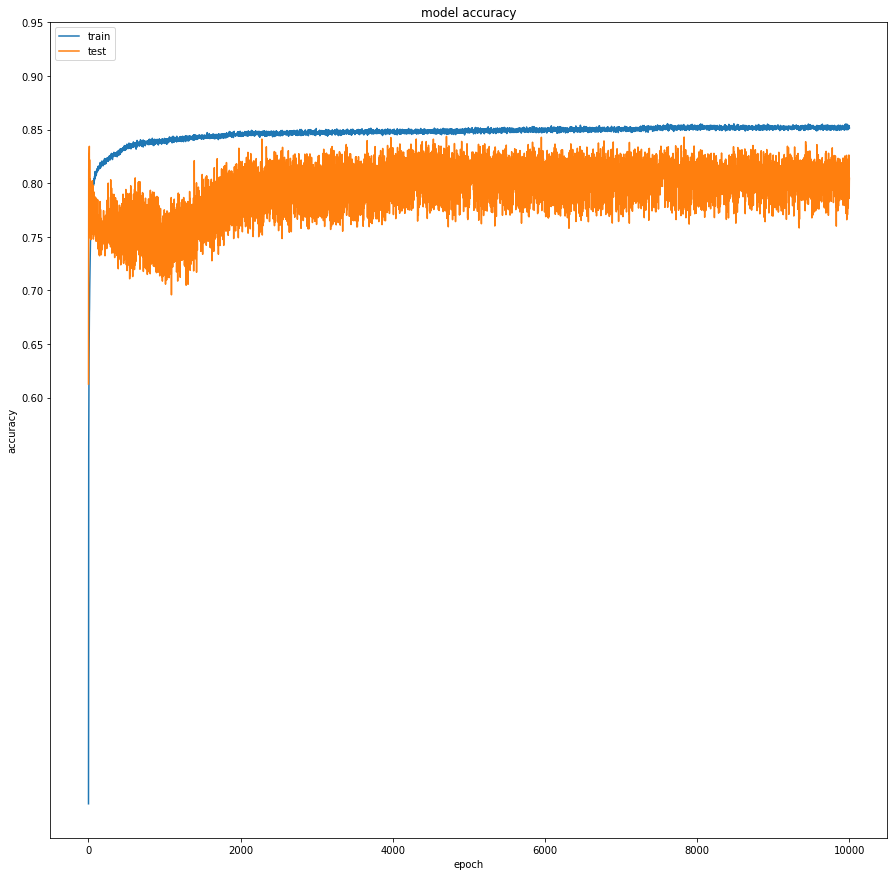

In [125]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.plot(abc.history['accuracy'])
plt.plot(abc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.yticks(np.arange(0.6,1,0.05))
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

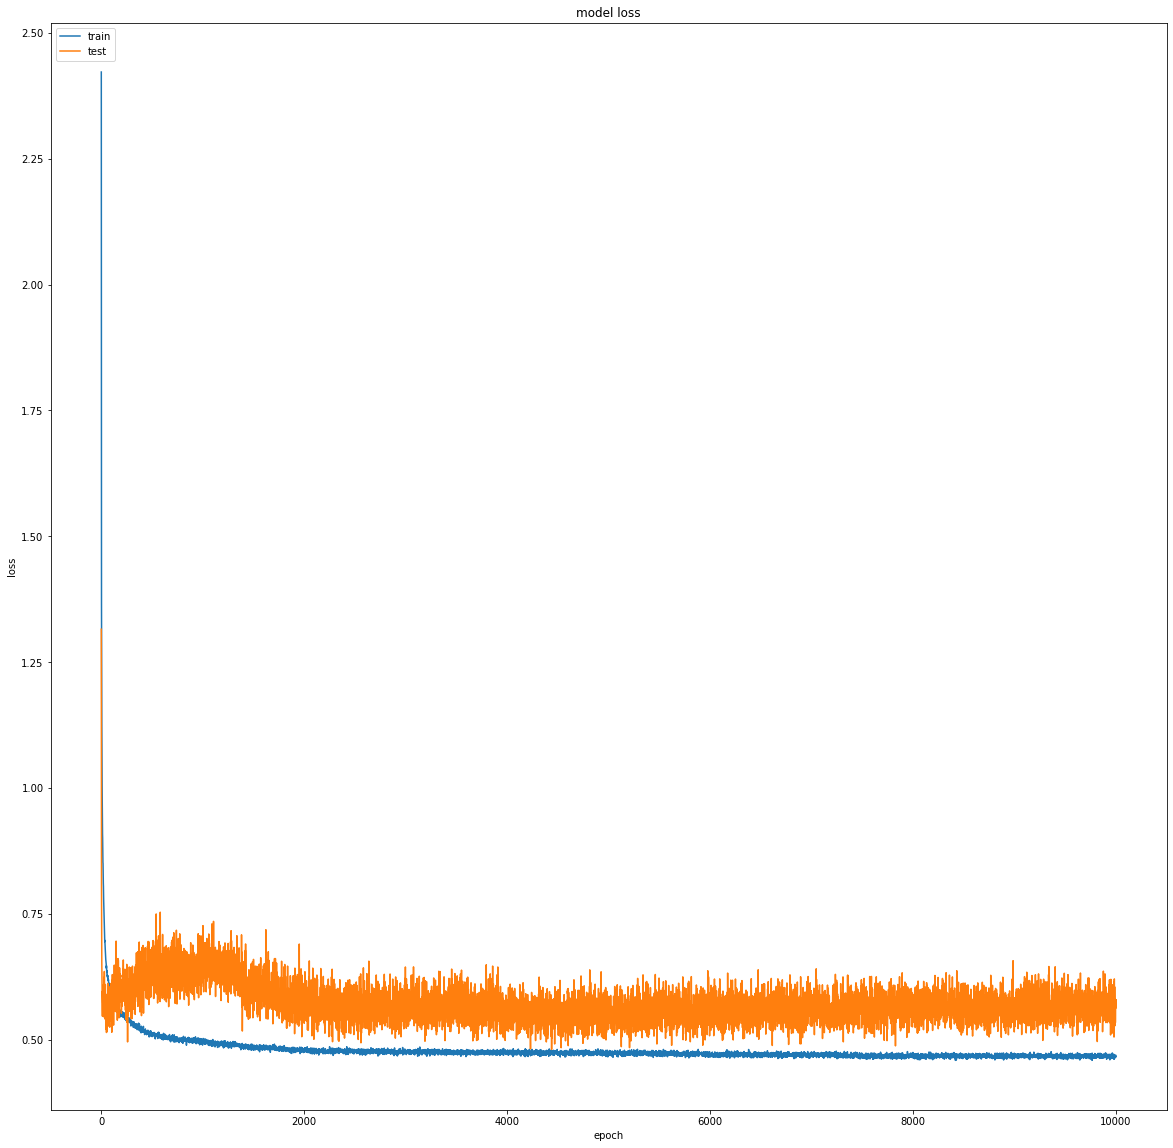

In [110]:
# summarize history for loss
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.plot(abc.history['loss'])
plt.plot(abc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
model.save(model_save_path)

In [112]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [113]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.8833521e-05 2.5275483e-19 7.9440565e-11 3.6973362e-09 8.5624826e-08
 2.1615361e-03 4.3792686e-10 1.4732720e-07 9.0699987e-06 4.0811156e-07
 2.8203062e-09 2.2316794e-17 1.2735956e-04 9.5252093e-05 1.7628807e-05
 5.3318970e-13 1.3588968e-11 1.6197175e-12 1.1696501e-06 2.5473199e-07
 3.3323647e-07 6.6219936e-18 1.1003434e-05 2.3502147e-09 9.9658978e-01
 9.5721299e-04]
24


# Confusion matrix

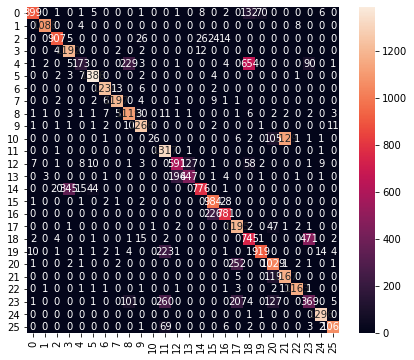

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1126
           1       0.99      0.99      0.99      1100
           2       0.96      0.91      0.93      1002
           3       0.77      0.98      0.86      1212
           4       0.81      0.15      0.25      1163
           5       0.95      0.99      0.97      1405
           6       0.98      0.98      0.98      1255
           7       0.98      0.98      0.98      1223
           8       0.76      0.93      0.84      1197
           9       0.93      0.98      0.95      1296
          10       0.96      0.02      0.04      1272
          11       0.70      1.00      0.82      1320
          12       0.74      0.72      0.73       819
          13       0.78      0.68      0.73       655
          14       0.94      0.65      0.77      1201
          15       0.79      0.97      0.87      1019
          16       0.93      0.78      0.84      1007
     

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    #l=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
    #l=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
    
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
     
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [115]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [116]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hrush\AppData\Local\Temp\tmpyjn8k8ur\assets


9432

# Inference test

In [117]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [118]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [119]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [120]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 998 µs


In [121]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.7097866e-05 8.1953035e-18 1.6629154e-09 1.5479758e-08 4.7660077e-07
 3.0228791e-03 1.9858126e-09 2.6228781e-07 2.0109599e-05 7.5939226e-07
 7.9096999e-08 3.9270271e-16 2.6601244e-04 1.8115270e-04 4.2921383e-05
 8.9407509e-12 2.6024852e-10 1.2399908e-09 5.8732944e-06 8.8237516e-07
 1.2244610e-06 1.9817653e-15 1.9129923e-04 7.1514319e-09 9.9322295e-01
 2.9861063e-03]
24
